<a href="https://colab.research.google.com/github/xxxnmxhj00/YOLO/blob/main/%5Bup%5DPASCALVOCXML_to_YOLOXT_bbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

dataset 다운로드

-AI HUB 항만 구조물 영상 샘플데이터



In [ ]:
!pip install gdown
!gdown --id 13HNXVppR9BOWuwgMRFoHlnCL__LZAp0z --output /content/ship.zip

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=13HNXVppR9BOWuwgMRFoHlnCL__LZAp0z
From (redirected): https://drive.google.com/uc?id=13HNXVppR9BOWuwgMRFoHlnCL__LZAp0z&confirm=t&uuid=46471239-f1f3-42ec-b85f-d8f3874fb864
To: /content/ship.zip
100% 260M/260M [00:01<00:00, 132MB/s]


In [ ]:
# xml을 txt확장자로 바꾸는 목표, 데이터의 개수는 맞는데 이름이 달라서 학습이 안되는데 이름이 다른 것들 파이썬으로 손쉽게 찾을 수 있음
# 이미지 라벨 파일이 안맞는 것을 찾는 것

In [ ]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches # 도형 시각화
from bs4 import BeautifulSoup

In [ ]:
!unzip -qq ship.zip
!rm ship.zip

replace ship/images/fishing_boat_b_56_0000002.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A


- golb 패키지를 이용해 데이터셋을 로드
- 추가로 sorted 함수를 사용해 img_list에 있는 파일의 id 순서와 annot_list에 있는 파일 id 순서가 같도록 정렬

In [ ]:
img_list = sorted(glob.glob('ship/images/*'))
# glob.glob('ship/images/*')는 ship/images 디렉토리 내에 있는 모든 파일의 경로를 리스트로 반환
annot_list = sorted(glob.glob('ship/annotations/*'))

In [ ]:
print(len(img_list))
print(len(annot_list))

650
650


In [ ]:
print(img_list[:10])
print(annot_list[:10])

['ship/images/fishing_boat_b_56_0000002.jpg', 'ship/images/fishing_boat_b_56_0000007.jpg', 'ship/images/fishing_boat_b_56_0000008.jpg', 'ship/images/fishing_boat_b_56_0000011.jpg', 'ship/images/fishing_boat_b_56_0000013.jpg', 'ship/images/fishing_boat_b_56_0000046.jpg', 'ship/images/fishing_boat_b_56_0000103.jpg', 'ship/images/fishing_boat_b_56_0000113.jpg', 'ship/images/fishing_boat_b_56_0000118.jpg', 'ship/images/fishing_boat_b_56_0000130.jpg']
['ship/annotations/fishing_boat_b_56_0000002.xml', 'ship/annotations/fishing_boat_b_56_0000007.xml', 'ship/annotations/fishing_boat_b_56_0000008.xml', 'ship/annotations/fishing_boat_b_56_0000011.xml', 'ship/annotations/fishing_boat_b_56_0000013.xml', 'ship/annotations/fishing_boat_b_56_0000046.xml', 'ship/annotations/fishing_boat_b_56_0000103.xml', 'ship/annotations/fishing_boat_b_56_0000113.xml', 'ship/annotations/fishing_boat_b_56_0000118.xml', 'ship/annotations/fishing_boat_b_56_0000130.xml']


- 파일의 id 순서가 동일한 것 확인

- 잘못된 이미지-라벨 삭제

In [ ]:
name_lst = [] # 이미지 파일 이름들을 담기 위해 사용
for imgname in img_list:
    name_lst.append(imgname.split('/')[-1][:-4])
    # split('/')을 사용하여 경로를 '/'을 기준으로 나누고, 리스트의 마지막 요소 [-1]을 통해 파일 이름을 가져옵니다.
    # 마지막 4글자(일반적으로 확장자 부분인 .jpg, .png 등을 제거)만 제외한 이름을 얻습니다.

In [ ]:
for annotname in annot_list:
    name = annotname.split('/')[-1][:-4]
    if name not in name_lst:
        print(annotname)
        os.remove(annotname)

ship/annotations/fishing_boat_b_56_0022200.xml
ship/annotations/fishing_boat_b_56_0022201.xml
ship/annotations/fishing_boat_b_56_0022202.xml
ship/annotations/fishing_boat_b_56_0022203.xml
ship/annotations/fishing_boat_b_56_0022204.xml
ship/annotations/fishing_boat_b_56_0022205.xml
ship/annotations/fishing_boat_b_56_0022206.xml
ship/annotations/fishing_boat_b_56_0022207.xml
ship/annotations/fishing_boat_b_56_0022208.xml


In [ ]:
name_lst = []
for imgname in annot_list:
    name_lst.append(imgname.split('/')[-1][:-4])

In [ ]:
for imgname in img_list:
    name = imgname.split('/')[-1][:-4]
    if name not in name_lst:
        print(imgname)
        os.remove(imgname)

ship/images/fishing_boat_b_56_0022220.jpg
ship/images/fishing_boat_b_56_0022221.jpg
ship/images/fishing_boat_b_56_0022222.jpg
ship/images/fishing_boat_b_56_0022223.jpg
ship/images/fishing_boat_b_56_0022224.jpg
ship/images/fishing_boat_b_56_0022225.jpg
ship/images/fishing_boat_b_56_0022226.jpg
ship/images/fishing_boat_b_56_0022227.jpg
ship/images/fishing_boat_b_56_0022228.jpg


In [ ]:
img_list = sorted(glob.glob('ship/images/*'))
annot_list = sorted(glob.glob('ship/annotations/*'))
print(len(img_list))
print(len(annot_list))

641
641


In [ ]:
!cat /content/ship/annotations/fishing_boat_b_56_0000002.xml

<?xml version="1.0" encoding="UTF-8"?>
<annotation verified="yes">
	<folder>.</folder>
	<filename>fishing_boat_b_56_0000002.jpg</filename>
	<path>.\fishing_boat_b_56_0000002.jpg</path>
	<source>
		<database>Unknown</database>
	</source>
	<information>
		<time_slot>day</time_slot>
	</information>
	<size>
		<width>1920</width>
		<height>1080</height>
		<depth>3</depth>
	</size>
	<segmented>0</segmented>
	<object>
		<name>fishing_boat</name>
		<pose>Unspecified</pose>
		<truncated>0</truncated>
		<difficult>0</difficult>
		<bndbox>
			<xmin>504</xmin>
			<ymin>606</ymin>
			<xmax>594</xmax>
			<ymax>641</ymax>
		</bndbox>
	</object>
</annotation>

In [ ]:
import xml.etree.ElementTree as ET
import json

In [ ]:
def xml_to_yolo_bbox(bbox, w, h):
  # xmin, ymin, xmax, ymax
  x_center = ((bbox[2] + bbox[0]) / 2) / w
  y_center = ((bbox[3] + bbox[1]) / 2) / h
  width = (bbox[2] - bbox[0]) / w
  height = (bbox[3] - bbox[1]) / h
  return [x_center, y_center, width, height]

In [ ]:
classes = []
input_dir = '/content/ship/annotations'
output_dir = '/content/ship/labels'
Image_dir = '/content/ship/images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

In [ ]:
files = glob.glob(os.path.join(input_dir, '*.xml')) # glob.glob() 함수는 특정 패턴과 일치하는 파일들의 경로를 리스트로 반환
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]
    if not os.path.exists(os.path.join(Image_dir, f'{filename}.jpg')):
        print(f'{filename} image dose not exist!')
        continue

In [ ]:
files = glob.glob(os.path.join(input_dir, '*.xml'))
for fil in files:
    basename = os.path.basename(fil)
    filename = os.path.splitext(basename)[0]

    if not os.path.exists(os.path.join(Image_dir, f'{filename}.jpg')):
        print(f'{filename} image dose not exist!')
        continue

    result = []
    tree = ET.parse(fil)
    root = tree.getroot()
    width = int(root.find("size").find("width").text)
    height = int(root.find("size").find("height").text)

    for obj in root.findall('object'):
        label = obj.find("name").text

        if label not in classes:
            classes.append(label)
        index = classes.index(label)
        pil_bbox = [int(x.text) for x in obj.find("bndbox")]
        yolo_bbox = xml_to_yolo_bbox(pil_bbox, width, height)

        bbox_string = " ".join([str(x) for x in yolo_bbox])
        result.append(f"{index} {bbox_string}")

    if result:
        with open(os.path.join(output_dir, f"{filename}.txt"), "w", encoding="utf-8") as f:
            f.write("\n".join(result))

In [ ]:
with open('classes.txt', 'w', encoding='utf8') as f:
  for cls in classes:
    f.write(cls+'\n')

In [ ]:
!cat /content/classes.txt

fishing_boat


In [ ]:
!cat /content/ship/labels/fishing_boat_b_56_0000002.txt

0 0.2859375 0.5773148148148148 0.046875 0.032407407407407406

bounding boxes 시각화

- yolo_to_xml_bbos -> yolo 경계 상자를 다시 xml 형식(픽셀기반)으로 변환합니다. 주로 pillow 모든 imageDraw.Draw기능에 픽셀을 사용하기 때문

- draw_image -> 입력 이미지 위에 경계 상자를 그립니다. 그런 다음 사용자 인터페이스를 표시

In [ ]:
from PIL import Image, ImageDraw

In [ ]:
def yolo_to_xml_bbox(bbox, w, h):

    w_half_len = (bbox[2] * w) / 2
    h_half_len = (bbox[3] * h) / 2
    xmin = int((bbox[0] * w) - w_half_len)
    ymin = int((bbox[1] * h) - h_half_len)
    xmax = int((bbox[0] * w) + w_half_len)
    ymax = int((bbox[1] * h) + h_half_len)
    return [xmin, ymin, xmax, ymax]

def draw_image(img,bboxes):
    draw = ImageDraw.Draw(img)
    for bbox in bboxes:
        draw.rectangle(bbox, outline='red',width=2)
    img.save("example.jpg")


In [ ]:
image_filename = "/content/ship/images/fishing_boat_b_56_0000002.jpg"
label_filename = "/content/ship/labels/fishing_boat_b_56_0000002.txt"
bboxes = []

In [ ]:
img = Image.open(image_filename)

with open(label_filename, 'r',encoding='utf8') as f:
    for line in f:
        data = line.strip().split(' ')
        bbox = [float(x) for x in data[1:]]
        bboxes.append(yolo_to_xml_bbox(bbox, img.width, img.height))

draw_image(img,bboxes)

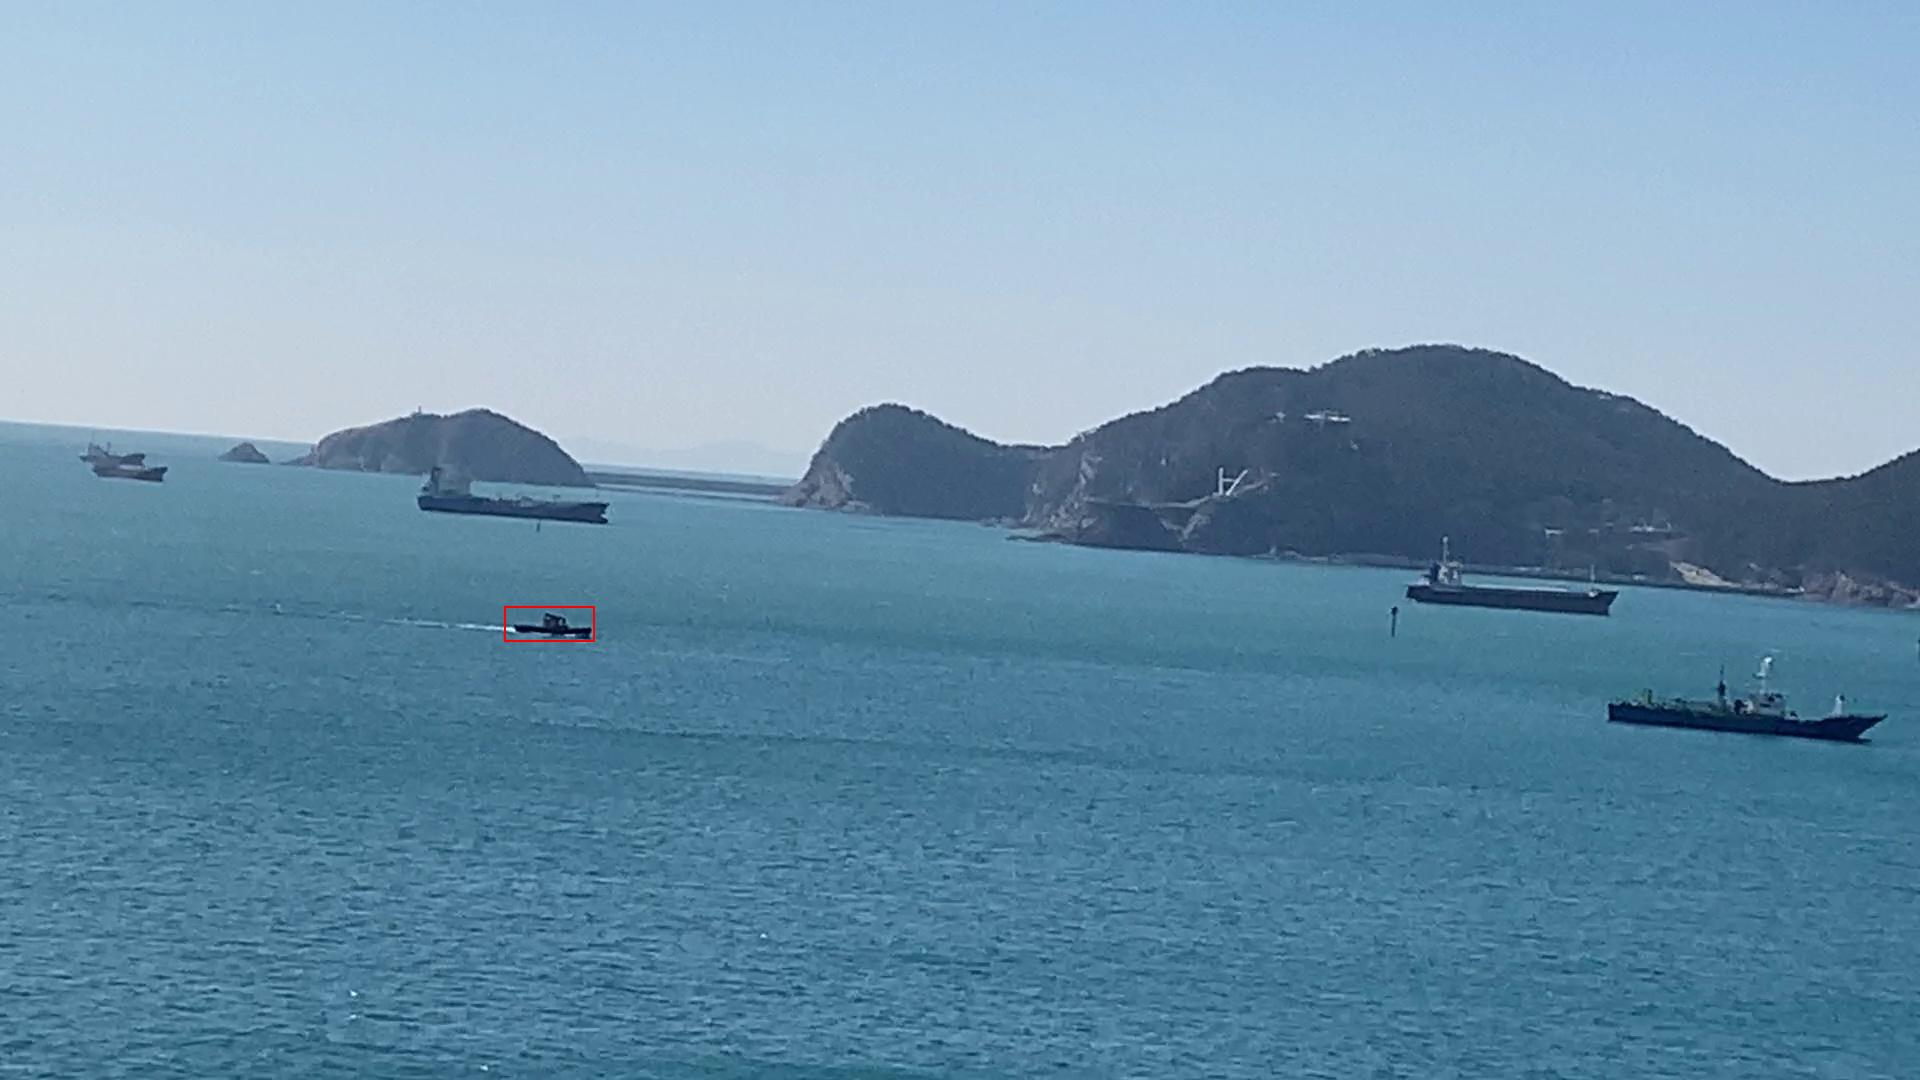

In [ ]:
import PIL.Image as pil

img_path = '/content/example.jpg'

img = pil.open(img_path)
img